<div align="center"> <h1>Data Standardization / Data Scaling</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

Standardization means removing the mean and scaling the features to unit variance. It is a common requirement and preprocessing for many machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np

car_prices = pd.read_csv("../data/car_prices.csv")

In [2]:
from sklearn.preprocessing import StandardScaler

features = (car_prices[['length', 'width', 'height', 'engine-size',  'stroke', 'compression-ratio', 'horsepower', 'price']]
            .replace('?', '', regex=False)
            .apply(pd.to_numeric, errors='coerce'))

std_scaler = StandardScaler()
features_std = std_scaler.fit_transform(features)

In [3]:
features_std = pd.DataFrame(features_std,
                         columns=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'])
features_std.head()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
0,-0.426521,-0.844782,-2.020417,0.074449,-1.821370,-0.288349,0.170228,0.036314
1,-0.426521,-0.844782,-2.020417,0.074449,-1.821370,-0.288349,0.170228,0.415385
2,-0.231513,-0.190566,-0.543527,0.604046,0.679195,-0.288349,1.255637,0.415385
3,0.207256,0.136542,0.235942,-0.431076,0.457626,-0.035973,-0.056950,0.093711
4,0.207256,0.230001,0.235942,0.218885,0.457626,-0.540725,0.271197,0.535224


Using the ```describe``` method we can verify that the mean and standard deviation values are very close to zero and one, respectively, while this is not the case otherwise:

In [4]:
features.describe()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,201.000000
mean,174.049268,65.907805,53.724878,126.907317,3.255423,10.142537,104.256158,13207.129353
std,12.337289,2.145204,2.443522,41.642693,0.316717,3.972040,39.714369,7947.066342
min,141.100000,60.300000,47.800000,61.000000,2.070000,7.000000,48.000000,5118.000000
25%,166.300000,64.100000,52.000000,97.000000,3.110000,8.600000,70.000000,7775.000000
50%,173.200000,65.500000,54.100000,120.000000,3.290000,9.000000,95.000000,10295.000000
75%,183.100000,66.900000,55.500000,141.000000,3.410000,9.400000,116.000000,16500.000000
max,208.100000,72.300000,59.800000,326.000000,4.170000,23.000000,288.000000,45400.000000


In [5]:
features_std.describe()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.010000e+02,2.050000e+02,2.030000e+02,2.010000e+02
mean,3.656696e-15,1.089643e-15,-5.372396e-16,3.466062e-17,9.721356e-16,-3.639365e-16,-1.159445e-16,-5.302558e-17
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002497e+00,1.002448e+00,1.002472e+00,1.002497e+00
min,-2.677244e+00,-2.620512e+00,-2.430664e+00,-1.586561e+00,-3.752186e+00,-7.931011e-01,-1.420021e+00,-1.020418e+00
25%,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.199469e-01,-4.603030e-01,-3.892993e-01,-8.646957e-01,-6.852457e-01
50%,-6.900603e-02,-1.905661e-01,1.538927e-01,-1.662771e-01,1.094460e-01,-2.883489e-01,-2.336444e-01,-3.673558e-01
75%,7.354037e-01,4.636501e-01,7.282388e-01,3.392475e-01,4.892786e-01,-1.873985e-01,2.964387e-01,4.153851e-01
max,2.766741e+00,2.987056e+00,2.492302e+00,4.792679e+00,2.894885e+00,3.244916e+00,4.638072e+00,4.061027e+00


Let's take a look at the histogram of the data before transformation:

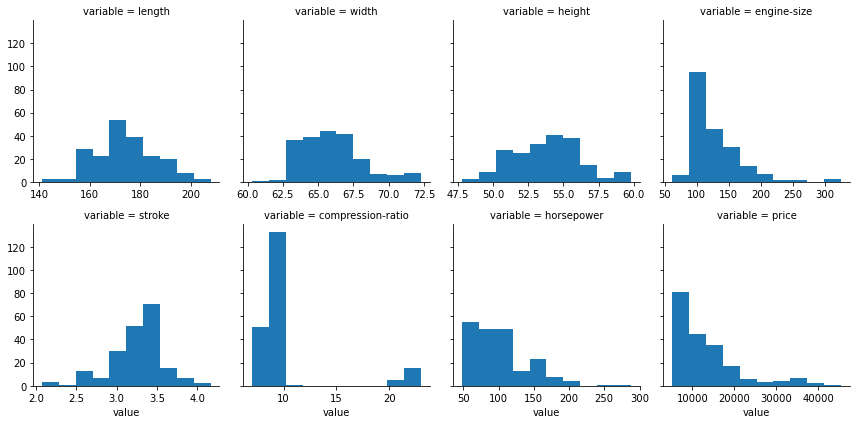

In [6]:
# VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

long_feat = pd.melt(features,
                  value_vars=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'] )
fg=sns.FacetGrid(long_feat, col="variable", col_wrap=4, sharex=False)
fg=fg.map(plt.hist, "value" )

Let's take a look at the histogram of the transformed data:

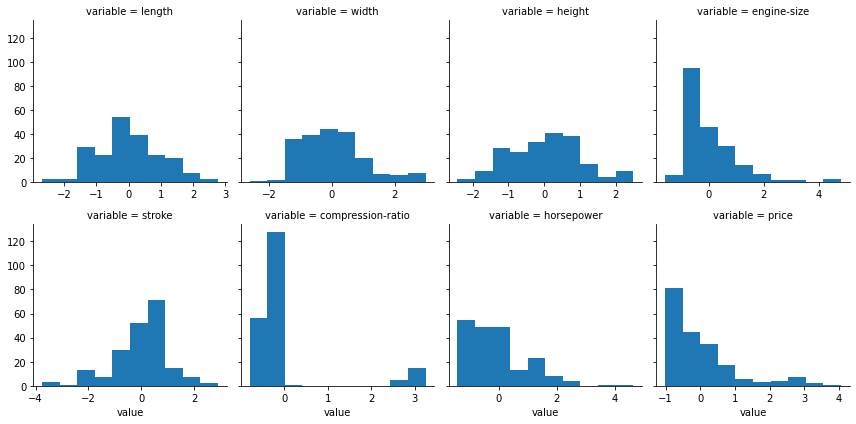

In [7]:
# VISUALISATION
long_feat = pd.melt(features_std,
                  value_vars=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'] )
fg=sns.FacetGrid(long_feat, col="variable", col_wrap=4, sharex=False)
fg=fg.map(plt.hist, "value" )

We can see the mean and scale used in the transformation:

In [8]:
print(std_scaler.mean_)
print(std_scaler.scale_)

[1.74049268e+02 6.59078049e+01 5.37248780e+01 1.26907317e+02
 3.25542289e+00 1.01425366e+01 1.04256158e+02 1.32071294e+04]
[1.23071608e+01 2.13996525e+00 2.43755487e+00 4.15410017e+01
 3.15928617e-01 3.96234058e+00 3.96164294e+01 7.92727287e+03]
